In [1]:
using NPZ
include("eq1d_func.jl")

solve_KS_1D_helper (generic function with 1 method)

# Poisson equation solver
$$-\triangle u = f$$

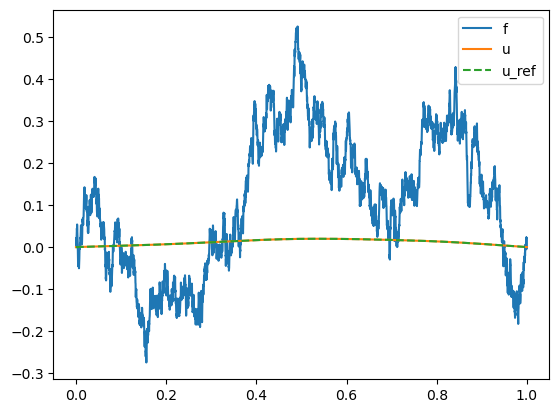

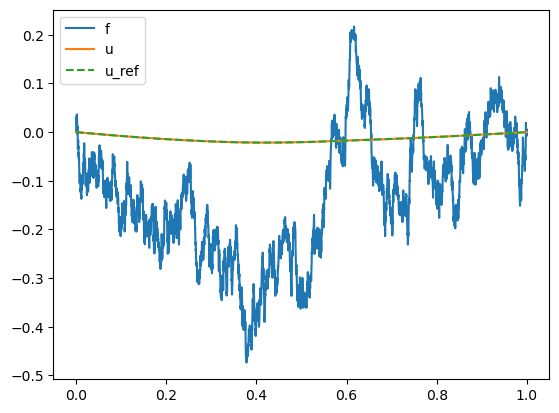

In [67]:
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^3; 2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11; 2^12]
Δxs = 1.0 ./ Nes
errors = zeros(length(Nes))

for (i, Ne) in enumerate(Nes)
    fs = generate_1d_rf(θs, Ne+1;  d=1.0, τ=3.0)
    us_ref = generate_1d_poisson_ref(θs, Ne+1;  d=1.0, τ=3.0)
    us = zeros(Nθ, Ne+1)
    for j = 1:Nθ
        us[j, :] = solve_Poisson_1D(fs[j, :])
    end
    
    errors[i] = norm(us - us_ref)/sqrt(Nθ)/sqrt(Ne)
    
    if i == length(Nes)
        for j = 1:Nθ
            PyPlot.figure()
            xx = LinRange(0,1,length(us[j, :]))
            PyPlot.plot(xx, fs[j, :], label="f")
            PyPlot.plot(xx, us[j, :], label="u")
            PyPlot.plot(xx, us_ref[j, :], "--", label="u_ref")
            PyPlot.legend()
        end
    end
    
end

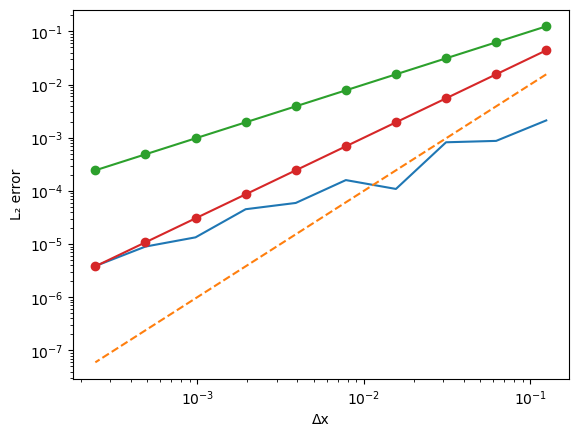

PyObject Text(24.000000000000007, 0.5, 'L₂ error')

In [68]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors)
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.loglog(Δxs, Δxs, "-o")
PyPlot.loglog(Δxs, Δxs.^(1.5), "-o")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 




# Darcy equation solver
$$-\nabla (a \nabla u) = f$$

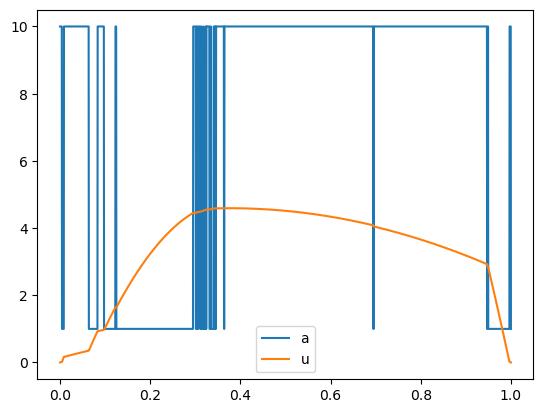

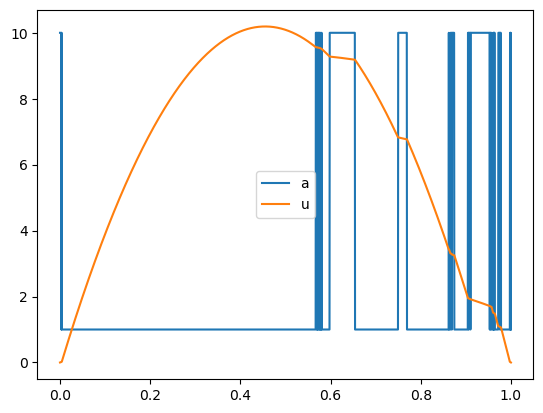

In [69]:
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^3; 2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11]
Δxs = 1.0 ./ Nes
errors = zeros(length(Nes))
a₊, a₋ = 10.0, 1.0

# compute reference solution
Ne_ref = 2^12
as = generate_1d_rf(θs, Ne_ref+1;  d=1.0, τ=3.0)
as[as .>= 0] .= a₊
as[as .< 0]  .= a₋
f = 100*ones(Ne_ref + 1)
us_ref = zeros(Nθ, Ne_ref + 1)
for j = 1:Nθ
    us_ref[j, :] = solve_Darcy_1D(as[j, :], f)
end


for (i, Ne) in enumerate(Nes)
    as  = generate_1d_rf(θs, Ne+1;  d=1.0, τ=3.0)
    as[as .>= 0] .= a₊
    as[as .< 0]  .= a₋
    
    f = 100*ones(Ne + 1)
    us = zeros(Nθ, Ne + 1)
    for j = 1:Nθ
        us[j, :] = solve_Darcy_1D(as[j, :], f)
    end
    
    errors[i] = norm(us - us_ref[:, 1:Int64(Ne_ref/Ne):end])/sqrt(Nθ)/sqrt(Ne)
    
    if i == length(Nes)
        for j = 1:Nθ
            PyPlot.figure()
            xx = LinRange(0,1,length(us[j, :]))
            PyPlot.plot(xx, as[j, :], label="a")
            PyPlot.plot(xx, us[j, :], label="u")
            PyPlot.legend()
        end
    end
    
end

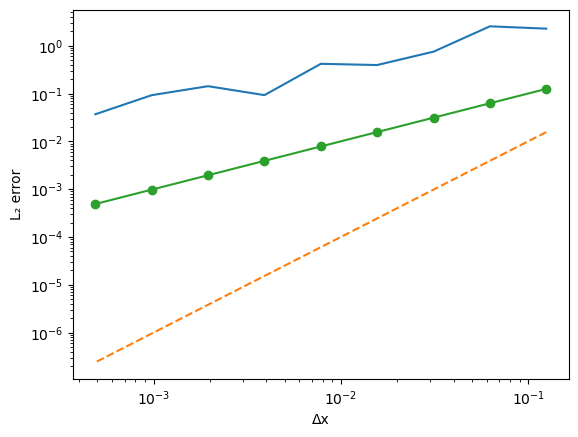

PyObject Text(24.000000000000007, 0.5, 'L₂ error')

In [70]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors)
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.loglog(Δxs, Δxs.^1, "-o")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 



# Heat equation
$$
u_t - \triangle u = f
$$

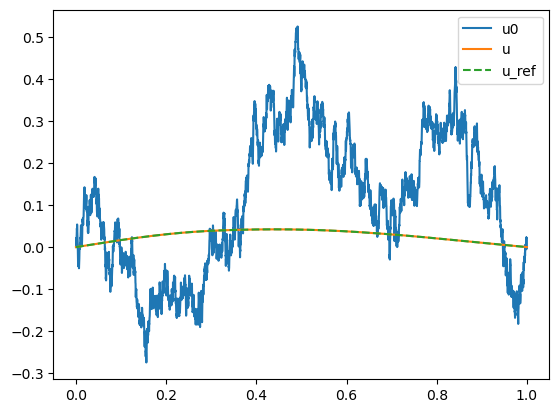

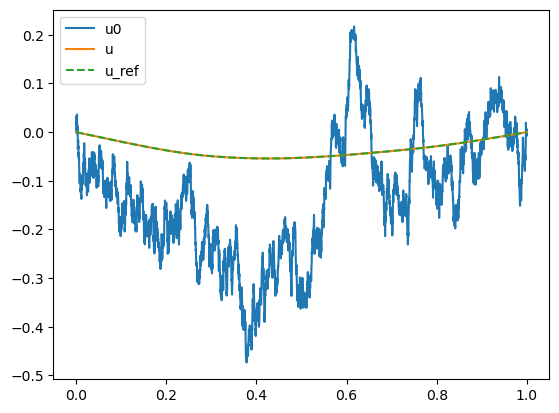

In [71]:
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)
θᵖs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11; 2^12]
Δxs = 1.0 ./ Nes
errors = zeros(length(Nes))
T = 1.0/8

for (i, Ne) in enumerate(Nes)
    u0s  = generate_1d_rf(θs, Ne+1;  d=1.0, τ=3.0)
    fs  = generate_1d_rf(θᵖs, Ne+1;  d=1.0, τ=3.0)
    

    Δt = 1/Ne
    Nt = Int64(T/Δt)
    
    
    
    us = zeros(Nθ, Ne+1)
    for j = 1:Nθ
        us[j, :] = solve_heat_1D(u0s[j, :], fs[j, :], Δt, Nt)
    end
    
    us_ref = generate_1d_heat_ref(θs, θᵖs, Ne+1, T;  d=1.0, τ=3.0)
    errors[i] = norm(us - us_ref)/sqrt(Nθ)/sqrt(Ne)
    
    if i == length(Nes)
        for j = 1:Nθ
            PyPlot.figure()
            xx = LinRange(0,1,length(us[j, :]))
            PyPlot.plot(xx, u0s[j, :], label="u0")
#             PyPlot.plot(xx, fs[j, :], label="f")
            PyPlot.plot(xx, us[j, :], label="u")
            PyPlot.plot(xx, us_ref[j, :], "--", label="u_ref")
            PyPlot.legend()
        end
    end
    
end

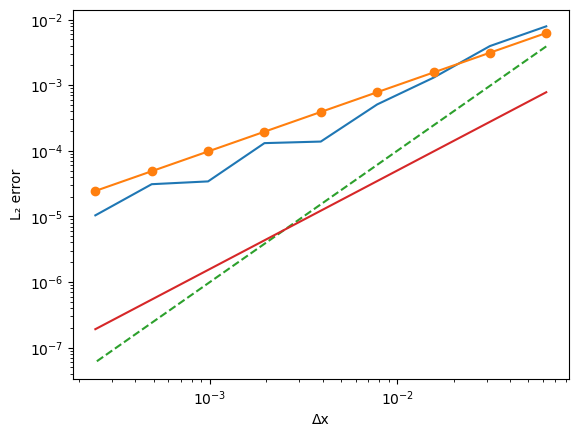

PyObject Text(24.000000000000007, 0.5, 'L₂ error')

In [72]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors)
PyPlot.loglog(Δxs, Δxs/10, "-o")
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.loglog(Δxs, Δxs.^1.5/20, "-")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 




# Burger's equation



 97.959042 seconds (3.80 M allocations: 232.194 GiB, 0.94% gc time)
103.994986 seconds (3.80 M allocations: 232.194 GiB, 8.08% gc time)


sys:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


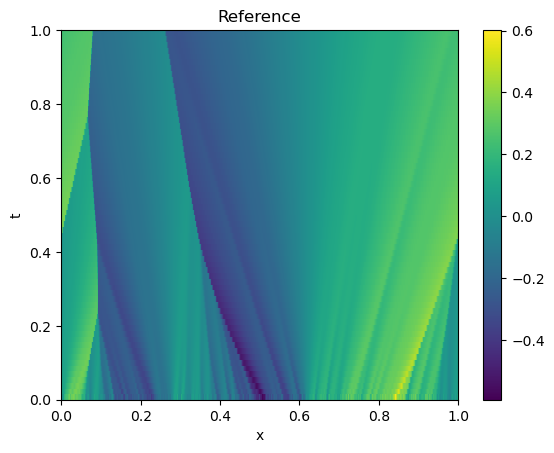

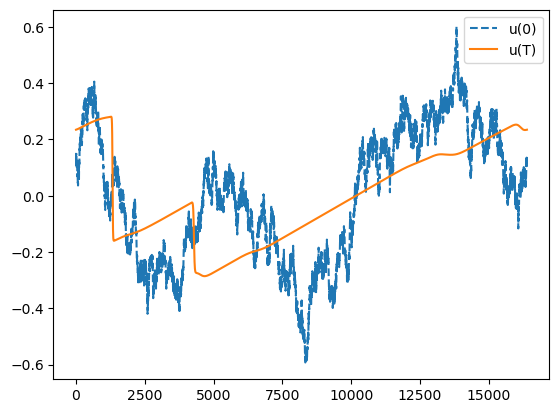

PyObject <matplotlib.legend.Legend object at 0x7f5f6c0b37d0>

In [6]:
using Random
using Distributions
using PyPlot
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11; 2^12]
Δxs = 1.0 ./ Nes

Ne_ref = 2^14

u0_ref = generate_1d_rf(θs, Ne_ref+1;  d=1.0, τ=3.0, boundary_condition="periodic")

f = zeros(Ne_ref+1)
Nt = 4Ne_ref
Δt = 1.0/(Nt)
ν = 1.0e-4
Nt_save = 64

us_ref = zeros(Nθ, Nt_save+1, Ne_ref+1)
for j = 1:Nθ
    @time us = solve_Burgers_1D(u0_ref[j, :], f, ν, Δt, Nt)
    us_ref[j,:,:] = us[1:div(Nt,Nt_save):end,:]
end

# plot reference
ind = 1
PyPlot.figure()
xx = Array(LinRange(0, 1, Ne_ref+1))
tt = Array(LinRange(0, 1, Nt_save+1))
# PyPlot.imshow(us_ref[ind,:,:]')
PyPlot.pcolormesh(xx, tt, us_ref[ind,:,:])
PyPlot.colorbar()
PyPlot.xlabel("x")
PyPlot.ylabel("t")
PyPlot.title("Reference")
PyPlot.figure()
PyPlot.plot(us_ref[ind, 1, :], "--", label="u(0)")
PyPlot.plot(us_ref[ind, end, :], label="u(T)")
PyPlot.legend()



  0.000347 seconds (1.92 k allocations: 347.203 KiB)
  0.000334 seconds (1.92 k allocations: 347.203 KiB)
  0.001038 seconds (3.85 k allocations: 1.186 MiB)
  0.001111 seconds (3.85 k allocations: 1.186 MiB)
  0.003859 seconds (7.68 k allocations: 4.074 MiB)
  0.003675 seconds (7.68 k allocations: 4.074 MiB)
  0.013090 seconds (15.37 k allocations: 15.398 MiB, 20.02% gc time)
  0.013500 seconds (15.37 k allocations: 15.398 MiB)
  0.063551 seconds (30.73 k allocations: 63.295 MiB, 13.24% gc time)
  0.059757 seconds (30.73 k allocations: 63.295 MiB, 8.51% gc time)
  0.176205 seconds (61.45 k allocations: 242.590 MiB, 12.14% gc time)
  0.152556 seconds (61.45 k allocations: 242.590 MiB, 12.59% gc time)
  0.736973 seconds (122.89 k allocations: 949.180 MiB, 33.71% gc time)
  0.424174 seconds (122.89 k allocations: 949.180 MiB, 5.16% gc time)
  1.878622 seconds (475.14 k allocations: 3.649 GiB, 5.06% gc time)
  1.888541 seconds (475.14 k allocations: 3.649 GiB, 4.06% gc time)
  6.833264 sec

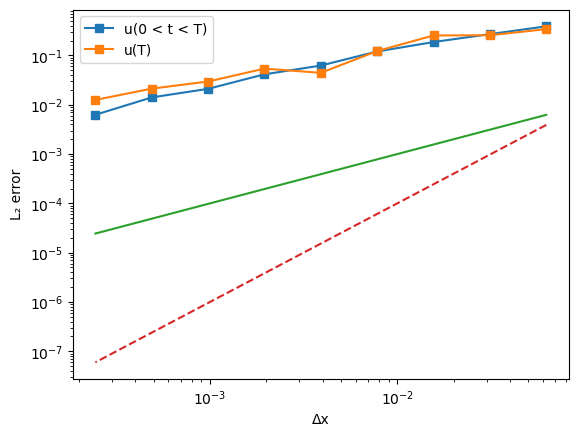

PyObject <matplotlib.legend.Legend object at 0x7f5f6bf04c10>

In [7]:
# compute error for space and time solution
errors = zeros(2, length(Nes))
for (i, Ne) in enumerate(Nes)
    Nt = 4Ne
    Nt_save = 64
    Δt = 1.0/(Nt)
    ν = 1.0e-4
    
    u0 = u0_ref[:, 1:Int64(Ne_ref/Ne):end]
    f = zeros(Ne+1)
    us = zeros(Nθ, Nt_save+1, Ne+1)
    for j = 1:Nθ
        @time us_temp = solve_Burgers_1D(u0[j, :], f, ν, Δt, Nt)
        us[j, :, :] = us_temp[1:div(Nt,Nt_save):end, :]
    end
    
    errors[1, i] = norm(us - us_ref[:, :, 1:Int64(Ne_ref/Ne):end])/norm(us_ref[:, :, 1:Int64(Ne_ref/Ne):end])
    errors[2, i] = norm(us[:,end,:] - us_ref[:, end, 1:Int64(Ne_ref/Ne):end])/norm(us_ref[:, end, 1:Int64(Ne_ref/Ne):end])
    
end

PyPlot.figure()
PyPlot.loglog(Δxs, errors[1, :], "-s", label="u(0 < t < T)")
PyPlot.loglog(Δxs, errors[2, :], "-s", label="u(T)")
PyPlot.loglog(Δxs, Δxs/10, "-")
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 
PyPlot.legend()

# Kuramoto Sivashinksy Equation

In [11]:
Random.seed!(42);

Ne_ref = 2^11
Lx = 100.0
Δx = Lx/Ne_ref

xx = Array(LinRange(0, Lx - Δx, Ne_ref))
T_scale_ref = 2^11
T  = T_scale_ref*Lx
Nt = T_scale_ref*Ne_ref
ν₂ = 1.0
ν₄ = 1.0
Δt = T/Nt
save_every = T_scale_ref


Nθ, Nk = 10, 20
θs = rand(Normal(0, 1), Nθ, Nk)
# f = [1.0, 1.0] * 0.05*sin.((8 * pi * xx) / Lx)' + 0.05*generate_1d_rf(θs, Ne+1; L=Lx,  d=2.0, τ=3.0, boundary_condition="periodic")[:, 1:end-1]
f_ref = 0.05*generate_1d_rf(θs, Ne_ref+1; L=Lx,  d=2.0, τ=3.0, boundary_condition="periodic")[:, 1:end-1]
u0_ref = ones(Nθ)*(0.0*xx)'

us_data_ref = zeros(Nθ, Ne_ref)
auto_correlation_data_ref = zeros(Nθ, Ne_ref)
energy_spectral_data_ref = zeros(Nθ, div(Ne_ref, 2))

u_all, Cx = nothing, nothing
for j = 1:Nθ
    @time u_all, auto_correlation, Cx, energy_spectral, Ex = solve_KS_1D(u0_ref[j,:], f_ref[j,:], T, Nt, Lx, ν₂, ν₄, save_every)
    us_data_ref[j, :], auto_correlation_data_ref[j, :], energy_spectral_data_ref[j, :] = u_all[end, :], auto_correlation, energy_spectral
end



 21.397435 seconds (32.77 M allocations: 19.089 GiB, 7.30% gc time)
 21.153524 seconds (32.77 M allocations: 19.089 GiB, 7.17% gc time)
 21.258962 seconds (32.77 M allocations: 19.089 GiB, 7.15% gc time)
 21.288081 seconds (32.77 M allocations: 19.089 GiB, 7.07% gc time)
 21.235742 seconds (32.77 M allocations: 19.089 GiB, 7.07% gc time)
 21.079134 seconds (32.77 M allocations: 19.089 GiB, 6.88% gc time)
 21.181745 seconds (32.77 M allocations: 19.089 GiB, 6.92% gc time)
 19.320075 seconds (32.77 M allocations: 19.089 GiB, 7.15% gc time)
 18.827440 seconds (32.77 M allocations: 19.089 GiB, 7.01% gc time)
 16.173581 seconds (32.77 M allocations: 19.089 GiB, 7.36% gc time)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


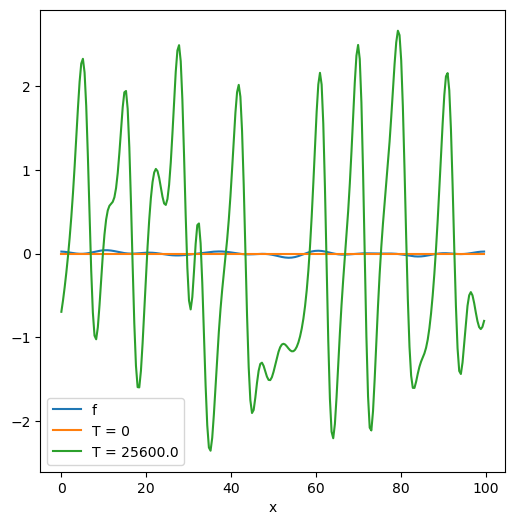

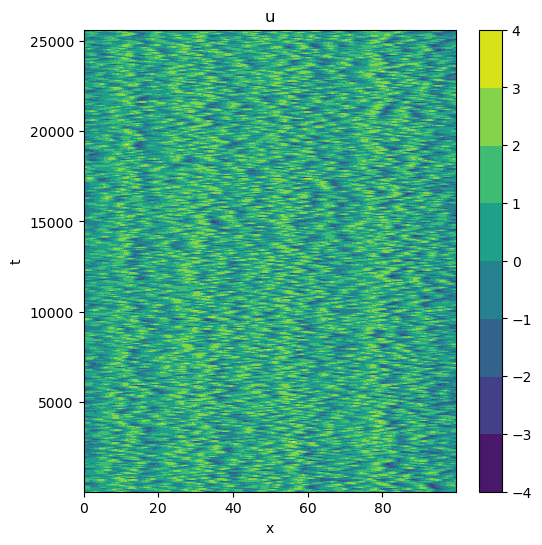

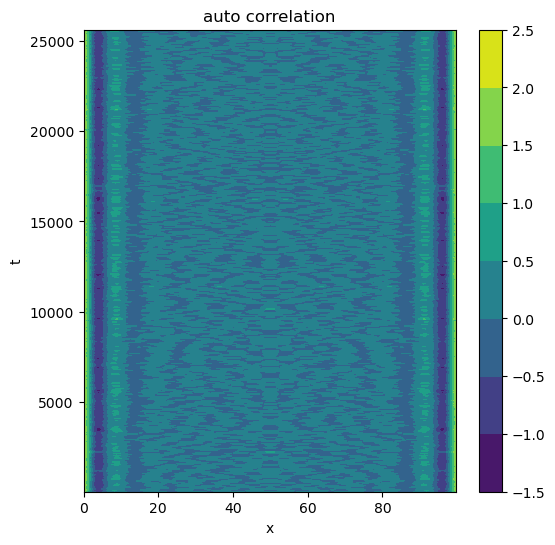

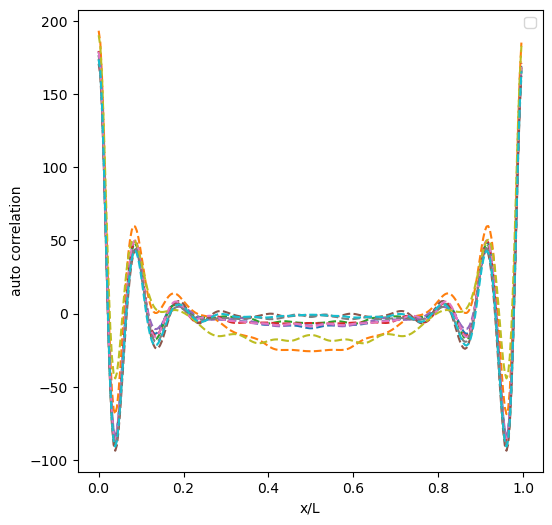

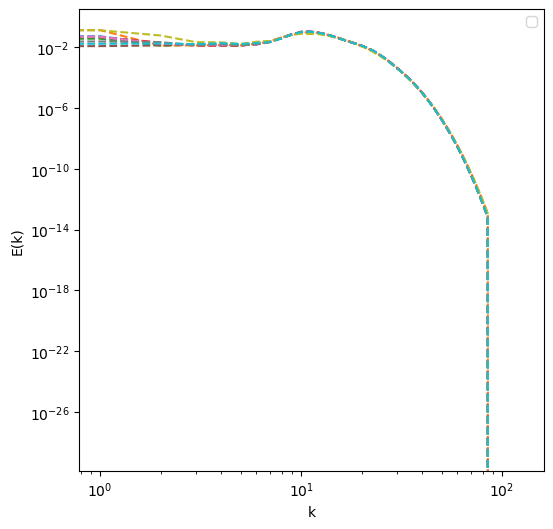

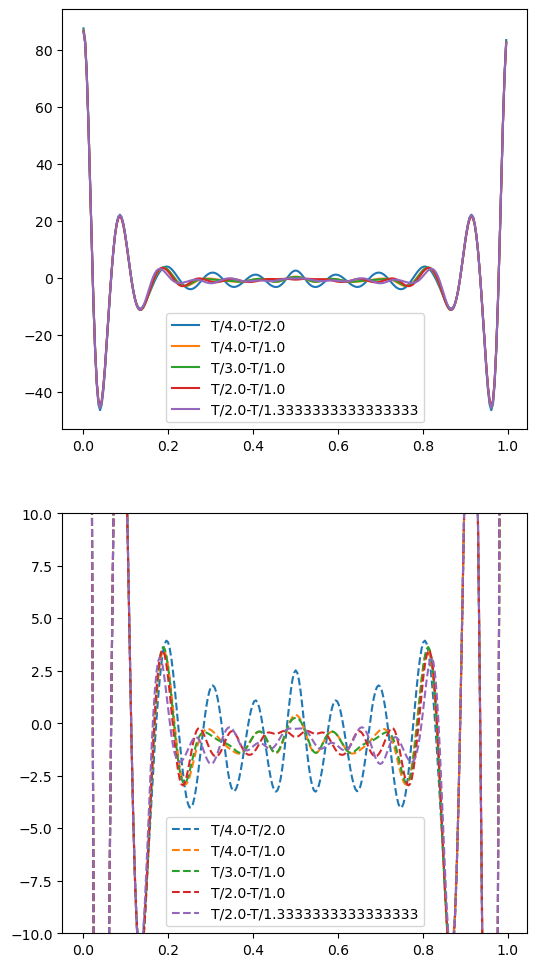

PyObject <matplotlib.legend.Legend object at 0x7f6acfa03490>

In [12]:
fig, ax = PyPlot.subplots(nrows=1, ncols=1, sharex=false, sharey=false, figsize=(6,6))
ax.plot(xx, f_ref[1,:], label="f")
ax.plot(xx, u0_ref[1, :], label="T = 0")
ax.plot(xx, us_data_ref[1, :], label="T = "*string(T))
ax.set_xlabel("x")
ax.legend()


T, X = repeat(Δt*save_every*Array(1:div(Nt, save_every)), 1, Ne_ref), repeat(xx, 1, div(Nt, save_every))' 
fig, ax = PyPlot.subplots(nrows=1, ncols=1, sharex=false, sharey=false, figsize=(6,6))
cs = ax.contourf(X, T, u_all, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title("u")
fig.colorbar(cs)

fig, ax = PyPlot.subplots(nrows=1, ncols=1, sharex=false, sharey=false, figsize=(6,6))
cs = ax.contourf(X, T, Cx, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_title("auto correlation")
fig.colorbar(cs)


fig, ax = PyPlot.subplots(nrows=1, ncols=1, sharex=false, sharey=false, figsize=(6,6))
for i = 1:Nθ
    ax.plot(xx/Lx, auto_correlation_data_ref[i, :], "--")
end
ax.set_xlabel("x/L")
ax.set_ylabel("auto correlation")
ax.legend()


fig, ax = PyPlot.subplots(nrows=1, ncols=1, sharex=false, sharey=false, figsize=(6,6))
for i = 1:Nθ
    ax.loglog(energy_spectral_data_ref[i, :], "--")
end
ax.set_xlabel("k")
ax.set_ylabel("E(k)")
ax.legend()


# plot Cs convergence
Ns = div(Nt, save_every)
fig, ax = PyPlot.subplots(nrows=2, ncols=1, sharex=false, sharey=false, figsize=(6,12))
for (N_start_ratio, N_end_ratio) in [[4,2], [4,1], [3,1], [2,1], [2,4/3]]
    N_start, N_end = Int64(div(Ns, N_start_ratio)), Int64(div(Ns, N_end_ratio))
    auto_correlation = Lx/(N_end - N_start) * (sum(Cx[N_start+1:2:N_end, :], dims=1)[:])
    ax[1].plot(xx/Lx, auto_correlation, label="T/"*string(N_start_ratio)*"-T/"*string(N_end_ratio))
    ax[2].plot(xx/Lx, auto_correlation, label="T/"*string(N_start_ratio)*"-T/"*string(N_end_ratio), "--")
end

ax[1].legend()
ax[2].set_ylim([-10,10])
ax[2].legend()

In [9]:
size(X)

(1024, 1024)

# Error analysis

In [4]:
Nes = [2^8; 2^9; 2^10; 2^11]
T_scales = [2^8; 2^9; 2^10; 2^11]
Δxs = 1.0 ./ Nes
# compute error for space and time solution
errors = zeros(Nθ, 3, length(Nes), length(T_scales))
costs = zeros(length(Nes), length(T_scales))



for (i, Ne) in enumerate(Nes)
    for (j, T_scale) in enumerate(T_scales)
        @info Ne, T_scale
        
        if Ne == Ne_ref && T_scale == T_scale_ref
            continue
        end
        T  = T_scale*Lx
        
        Nt = div(T_scale*Ne, 1)
        Δt = T/Nt
        Δx = Lx/Ne
        xx = Array(LinRange(0, Lx - Δx, Ne))
        save_every = T_scale
    
        u0 = u0_ref[:, 1:Int64(Ne_ref/Ne):end]
        f = f_ref[:, 1:Int64(Ne_ref/Ne):end]
    
    
        us_data = zeros(Nθ, Ne)
        auto_correlation_data = zeros(Nθ, Ne)
        energy_spectral_data = zeros(Nθ, div(Ne, 2))
        
        costs[i, j] = Nt * (4*(5*log(Ne)*Ne) + 9*Ne)
        
        for k = 1:Nθ
            u_all, auto_correlation, Cx, energy_spectral, Ex = solve_KS_1D(u0[k,:], f[k,:], T, Nt, Lx, ν₂, ν₄, save_every)
            us_data[k, :], auto_correlation_data[k, :], energy_spectral_data[k, :] = u_all[end, :], auto_correlation, energy_spectral

            errors[k, 1, i, j] = norm(us_data[k, :] - us_data_ref[k, 1:Int64(Ne_ref/Ne):end])/norm(us_data_ref[k, 1:Int64(Ne_ref/Ne):end])
            errors[k, 2, i, j] = norm(auto_correlation_data[k, :] - auto_correlation_data_ref[k, 1:Int64(Ne_ref/Ne):end])/norm(auto_correlation_data_ref[k, 1:Int64(Ne_ref/Ne):end])
            errors[k, 3, i, j] = norm(energy_spectral_data[k, :] - energy_spectral_data_ref[k, 1:Int64(Ne_ref/Ne):end])/norm(energy_spectral_data_ref[k, 1:Int64(Ne_ref/Ne):end])
        end
    end
end

npzwrite("KS_errors.npy", errors)
npzwrite("KS_costs.npy", costs)

┌ Info: (256, 256)
└ @ Main In[4]:11
┌ Info: (256, 512)
└ @ Main In[4]:11
┌ Info: (256, 1024)
└ @ Main In[4]:11
┌ Info: (256, 2048)
└ @ Main In[4]:11
┌ Info: (512, 256)
└ @ Main In[4]:11
┌ Info: (512, 512)
└ @ Main In[4]:11
┌ Info: (512, 1024)
└ @ Main In[4]:11
┌ Info: (512, 2048)
└ @ Main In[4]:11
┌ Info: (1024, 256)
└ @ Main In[4]:11
┌ Info: (1024, 512)
└ @ Main In[4]:11
┌ Info: (1024, 1024)
└ @ Main In[4]:11
┌ Info: (1024, 2048)
└ @ Main In[4]:11
┌ Info: (2048, 256)
└ @ Main In[4]:11
┌ Info: (2048, 512)
└ @ Main In[4]:11
┌ Info: (2048, 1024)
└ @ Main In[4]:11
┌ Info: (2048, 2048)
└ @ Main In[4]:11


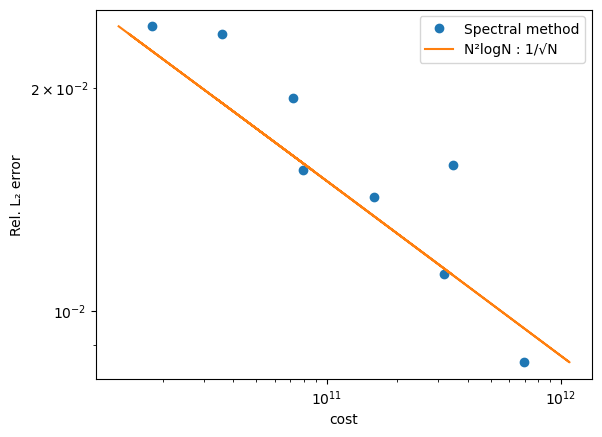

PyObject <matplotlib.legend.Legend object at 0x7f405b88ae90>

In [58]:
errors = npzread("KS_errors.npy") 
costs = npzread("KS_costs.npy")

ave_errors = dropdims(mean(errors, dims=1), dims=1)

PyPlot.figure()
costs_arr = costs[:]
ave_errors_arr = ave_errors[2,:,:][:]
ind = ave_errors_arr .> 0
PyPlot.loglog(costs_arr[ind], ave_errors_arr[ind], "o", label="Spectral method")


N_unit = (1.0 ./ ave_errors_arr[ind]).^2
PyPlot.loglog(600*N_unit.^2 .* log.(N_unit), ave_errors_arr[ind], "-", label="N²logN : 1/√N")
PyPlot.xlabel("cost")
PyPlot.ylabel("Rel. L₂ error") 
PyPlot.legend()


In [25]:
10^12 ./ costs_arr[ind]

8-element Vector{Float64}:
 55.69840740856547
 12.617030846192405
  2.883487679764973
 27.849203704282736
  6.308515423096202
  1.4417438398824864
 13.924601852141368
  3.154257711548101

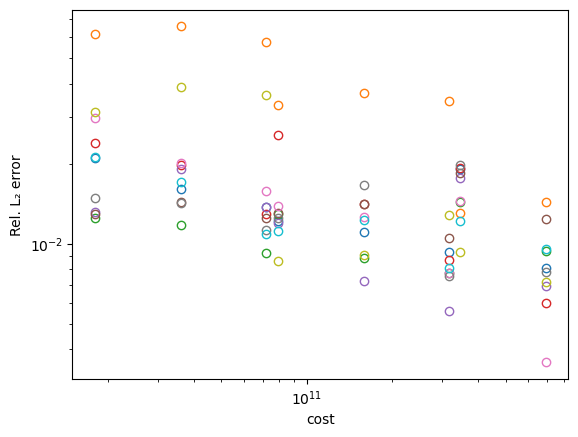

PyObject Text(24.000000000000007, 0.5, 'Rel. L₂ error')

In [14]:
errors = npzread("KS_errors.npy") 
costs = npzread("KS_costs.npy")


PyPlot.figure()
costs_arr = costs[:]
for i = 1:10
    ave_errors_arr = errors[i, 2,:,:][:]

    ind = ave_errors_arr .> 0
    PyPlot.loglog(costs_arr[ind], ave_errors_arr[ind], "o", fillstyle="none")
end
PyPlot.xlabel("cost")
PyPlot.ylabel("Rel. L₂ error") 

In [13]:
costs

3×3 Matrix{Float64}:
 1.79538e10  3.59077e10  7.18153e10
 7.9258e10   1.58516e11  3.17032e11
 3.46802e11  6.93604e11  0.0

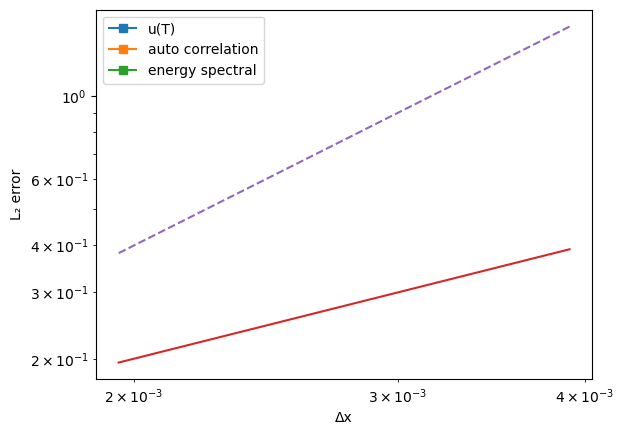

PyObject <matplotlib.legend.Legend object at 0x7fcb03eb8e10>

In [14]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors[1, :], "-s", label="u(T)")
PyPlot.loglog(Δxs, errors[2, :], "-s", label="auto correlation")
PyPlot.loglog(Δxs, errors[3, :], "-s", label="energy spectral")
PyPlot.loglog(Δxs, Δxs*100, "-")
PyPlot.loglog(Δxs, Δxs.^2*100000, "--")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 
PyPlot.legend()

In [9]:
@time 2887.67/2

  0.000000 seconds


1443.835

In [21]:
Nt

40960.0

In [60]:

Nθ, Nk = 2, 128
θs = rand(Normal(0, 1), Nθ, Nk)


2×256 Matrix{Float64}:
 0.0444835  0.0707464  0.0558504  …  0.0204814  0.00950039  0.0133163
 0.0469957  0.0717799  0.0623023     0.0630467  0.0564182   0.0379354

In [67]:
[ones(5) ones(5)]'

2×5 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0